## The Bernoulli or Binary distribution

In the previous sections, we discussed several probability theory situations regarding throwing a dice or flipping a coin. The Bernoulli distribution is a discrete distribution that formalizes the idea of a coin flip. 

The Bernoulli experiment is a simple experiment in which there is a binary
outcome: 0-1, success-failure, heads-tails, etc. 

If we were to model a coin flip with a Bernoulli distribution, we could say that 0 means heads, and 1 tails. With a fair coin, obtaining either value when performing a coin toss would have an assigned probability of 0.5. The Bernoulli experiment can also describe events with different probability structures. For example, let's say that the chance of scoring a penalty goal is 80%. Where $Y$ is the penalty outcome:

$Y = Bernoulli(p)$ and $p=P(Y=1)=0.8$.

The distribution is defined by 1 parameter, the parameter $p$, describing the chance of "success".

Let's look at the PMF and the CDF when $p=0.8$.
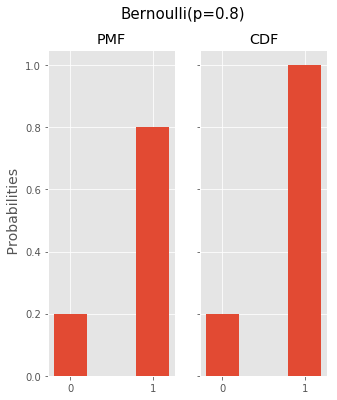

A general rule for the Bernoulli distribution is that: $E(X)=p$ and $\sigma^2=p*(1-p)$.

Note how the Bernoulli distribution describes a single coin flip, a single penalty shot, etc. What if we repeat this process multiple times and are interested in the probability of obtaining a certain number of 1s/successes/tails? This process is described by the **binomial distribution**.

## The Binomial distribution

The binomial distribution describes the process of performing $n$ *independent* Bernoulli trials. So what does it mean that the trials are independent?

When we say that events are **independent, this means that an event is not affected by previous events**.

## Use NumPy to randomly generate Binomial and Bernoulli trials.


Use `np.random.binomial` to generate how many successful penalties we have when shooting 100 penalties.

In [2]:
import numpy as np
np.random.seed(123) # set a seed to get the same results
np.random.binomial(100, 0.8)

78

You can see how this number changes slightly every time and fluctuates around 80. If you'd repeat this many times, and then divide the final result by the number of times you've repeated this, you could expect that the amount of successes will converge to 80. The for loop below does this 500 times. 

In [ ]:
iteration = []
for loop in range(500):
    iteration.append(np.random.binomial(100, 0.8))
    np_it = np.array(iteration)

In [ ]:
sum(np_it)/500

Now we'll use `np.random.binomial` to illustrate our findings regarding penalties above. Let's keep track of how many times we observe 0 goals, 1 goal, 2 goals, and 3 goals and find the probabilities through simulation. Now, let's repeat our experiment 10000 times.

In [ ]:
n = 10000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(3, 0.8))
    np_it = np.array(iteration)

`np_it` stores the total penalty goal outcomes (0 to 3) for each of the 10000 iterations. Now using `np.unique()` with the optional argument `return_counts`, you get the levels of the $k$ as in your Binomial formula along with how often they occurred when running 10000 trials.

In [ ]:
values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

#### Create PMF 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(values, counts/10000, align='center', alpha=0.9)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('PMF of strikes in a bowling game')
plt.show()

#### Create CDF

In [ ]:
import matplotlib.pyplot as plt
plt.bar(values, np.cumsum(counts/5000), align='center', alpha=0.8)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('CDF of strikes in a bowling game');

## Factorial code


In [4]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

### Binomial distribution equation

In [ ]:
def binom_distr(n,p,k):
    p_k = (factorial(n)/(factorial(k)*factorial(n-k)))*(p**k*(1-p)**(n-k))
    return p_k